<span style="color:red; font-weight:bold; font-size:20px;">Weather Data Analysis Project</span>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
bgdf = pd.read_csv('temperature.csv') 
bgdf.head(3)


,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2009-01-01 00:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,18,11,2,91,0.0,1014,14,10,109,8
1,2009-01-01 01:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,17,9,2,93,0.0,1014,14,7,85,6
2,2009-01-01 02:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,16,7,2,94,0.0,1014,13,5,61,4


In [4]:
bgdf.columns

Index(['date_time', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour',
       'uvIndex', 'uvIndex.1', 'moon_illumination', 'moonrise', 'moonset',
       'sunrise', 'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC',
       'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM',
       'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph'],
      dtype='object')

In [5]:
bgdf = bgdf.drop(columns=['uvIndex.1'])
bgdf.head(3)

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2009-01-01 00:00:00,27,12,0.0,11.6,5,31,09:58 AM,10:03 PM,06:42 AM,...,18,11,2,91,0.0,1014,14,10,109,8
1,2009-01-01 01:00:00,27,12,0.0,11.6,5,31,09:58 AM,10:03 PM,06:42 AM,...,17,9,2,93,0.0,1014,14,7,85,6
2,2009-01-01 02:00:00,27,12,0.0,11.6,5,31,09:58 AM,10:03 PM,06:42 AM,...,16,7,2,94,0.0,1014,13,5,61,4


In [6]:
bgdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96432 entries, 0 to 96431
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_time          96432 non-null  object 
 1   maxtempC           96432 non-null  int64  
 2   mintempC           96432 non-null  int64  
 3   totalSnow_cm       96432 non-null  float64
 4   sunHour            96432 non-null  float64
 5   uvIndex            96432 non-null  int64  
 6   moon_illumination  96432 non-null  int64  
 7   moonrise           96432 non-null  object 
 8   moonset            96432 non-null  object 
 9   sunrise            96432 non-null  object 
 10  sunset             96432 non-null  object 
 11  DewPointC          96432 non-null  int64  
 12  FeelsLikeC         96432 non-null  int64  
 13  HeatIndexC         96432 non-null  int64  
 14  WindChillC         96432 non-null  int64  
 15  WindGustKmph       96432 non-null  int64  
 16  cloudcover         964

In [7]:
bgdf.describe()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
count,96432.000000,96432.000000,96432.0,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000
mean,29.646093,19.336735,0.0,10.653484,5.900448,46.094077,16.085418,25.002261,25.269662,24.422152,17.370966,34.847488,64.895460,0.077719,1010.554225,23.979810,9.274162,176.182097,12.448938
std,3.446427,2.773771,0.0,1.986738,0.851346,31.249725,4.161604,4.586926,4.430811,4.516766,7.426413,28.391021,21.856869,0.385865,3.187016,4.540028,2.184726,89.443207,5.716769
min,18.000000,11.000000,0.0,4.200000,4.000000,0.000000,-9.000000,12.000000,13.000000,12.000000,0.000000,0.000000,6.000000,0.000000,1000.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,18.000000,0.0,8.800000,5.000000,18.000000,14.000000,21.000000,22.000000,21.000000,12.000000,9.000000,49.000000,0.000000,1008.000000,21.000000,10.000000,94.000000,8.000000
50%,29.000000,20.000000,0.0,11.600000,6.000000,46.000000,18.000000,25.000000,25.000000,24.000000,17.000000,29.000000,68.000000,0.000000,1010.000000,23.000000,10.000000,163.000000,12.000000
75%,32.000000,21.000000,0.0,11.600000,6.000000,73.000000,19.000000,28.000000,28.000000,27.000000,22.000000,54.000000,83.000000,0.000000,1013.000000,27.000000,10.000000,262.000000,16.000000
max,40.000000,28.000000,0.0,12.900000,8.000000,100.000000,25.000000,43.000000,43.000000,42.000000,53.000000,100.000000,100.000000,16.900000,1021.000000,40.000000,20.000000,360.000000,41.000000


In [8]:
bgdf.isnull().sum()

date_time            0
maxtempC             0
mintempC             0
totalSnow_cm         0
sunHour              0
uvIndex              0
moon_illumination    0
moonrise             0
moonset              0
sunrise              0
sunset               0
DewPointC            0
FeelsLikeC           0
HeatIndexC           0
WindChillC           0
WindGustKmph         0
cloudcover           0
humidity             0
precipMM             0
pressure             0
tempC                0
visibility           0
winddirDegree        0
windspeedKmph        0
dtype: int64

In [9]:
bgdf['date_time'] = pd.to_datetime(bgdf['date_time'])# convert datatype to correct format
bgdf['maxtempC'] = bgdf['maxtempC'].astype(float)
bgdf['mintempC'] = bgdf['mintempC'].astype(float)
bgdf['uvIndex'] = bgdf['uvIndex'].astype(float)
bgdf[['DewPointC','FeelsLikeC','humidity','pressure','tempC']] = bgdf[['DewPointC','FeelsLikeC','humidity','pressure','tempC']].astype(float)
bgdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96432 entries, 0 to 96431
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date_time          96432 non-null  datetime64[ns]
 1   maxtempC           96432 non-null  float64       
 2   mintempC           96432 non-null  float64       
 3   totalSnow_cm       96432 non-null  float64       
 4   sunHour            96432 non-null  float64       
 5   uvIndex            96432 non-null  float64       
 6   moon_illumination  96432 non-null  int64         
 7   moonrise           96432 non-null  object        
 8   moonset            96432 non-null  object        
 9   sunrise            96432 non-null  object        
 10  sunset             96432 non-null  object        
 11  DewPointC          96432 non-null  float64       
 12  FeelsLikeC         96432 non-null  float64       
 13  HeatIndexC         96432 non-null  int64         
 14  WindCh

In [10]:
bgdf['year'] = bgdf['date_time'].dt.year
bgdf['month'] = bgdf['date_time'].dt.month
bgdf['day'] = bgdf['date_time'].dt.day
bgdf.head(3)

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,year,month,day
0,2009-01-01 00:00:00,27.0,12.0,0.0,11.6,5.0,31,09:58 AM,10:03 PM,06:42 AM,...,91.0,0.0,1014.0,14.0,10,109,8,2009,1,1
1,2009-01-01 01:00:00,27.0,12.0,0.0,11.6,5.0,31,09:58 AM,10:03 PM,06:42 AM,...,93.0,0.0,1014.0,14.0,7,85,6,2009,1,1
2,2009-01-01 02:00:00,27.0,12.0,0.0,11.6,5.0,31,09:58 AM,10:03 PM,06:42 AM,...,94.0,0.0,1014.0,13.0,5,61,4,2009,1,1


In [11]:
#Compute daily temperature range:
bgdf['temp_rangeC'] = bgdf['maxtempC'] - bgdf['mintempC']
bgdf.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,year,month,day,temp_rangeC
0,2009-01-01 00:00:00,27.0,12.0,0.0,11.6,5.0,31,09:58 AM,10:03 PM,06:42 AM,...,0.0,1014.0,14.0,10,109,8,2009,1,1,15.0
1,2009-01-01 01:00:00,27.0,12.0,0.0,11.6,5.0,31,09:58 AM,10:03 PM,06:42 AM,...,0.0,1014.0,14.0,7,85,6,2009,1,1,15.0
2,2009-01-01 02:00:00,27.0,12.0,0.0,11.6,5.0,31,09:58 AM,10:03 PM,06:42 AM,...,0.0,1014.0,13.0,5,61,4,2009,1,1,15.0
3,2009-01-01 03:00:00,27.0,12.0,0.0,11.6,5.0,31,09:58 AM,10:03 PM,06:42 AM,...,0.0,1014.0,12.0,2,37,3,2009,1,1,15.0
4,2009-01-01 04:00:00,27.0,12.0,0.0,11.6,5.0,31,09:58 AM,10:03 PM,06:42 AM,...,0.0,1015.0,14.0,5,45,3,2009,1,1,15.0


In [12]:
#Calculate wind speed categories:
bgdf['wind_category'] = pd.cut(bgdf['windspeedKmph'], bins=[0, 10, 30, 50, 100], labels=['Calm', 'Breezy', 'Windy', 'Stormy'])
bgdf.head(3)

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,pressure,tempC,visibility,winddirDegree,windspeedKmph,year,month,day,temp_rangeC,wind_category
0,2009-01-01 00:00:00,27.0,12.0,0.0,11.6,5.0,31,09:58 AM,10:03 PM,06:42 AM,...,1014.0,14.0,10,109,8,2009,1,1,15.0,Calm
1,2009-01-01 01:00:00,27.0,12.0,0.0,11.6,5.0,31,09:58 AM,10:03 PM,06:42 AM,...,1014.0,14.0,7,85,6,2009,1,1,15.0,Calm
2,2009-01-01 02:00:00,27.0,12.0,0.0,11.6,5.0,31,09:58 AM,10:03 PM,06:42 AM,...,1014.0,13.0,5,61,4,2009,1,1,15.0,Calm


In [13]:
duplicates = bgdf[bgdf.duplicated()]
duplicates
# There are no duplicate records.


,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,pressure,tempC,visibility,winddirDegree,windspeedKmph,year,month,day,temp_rangeC,wind_category


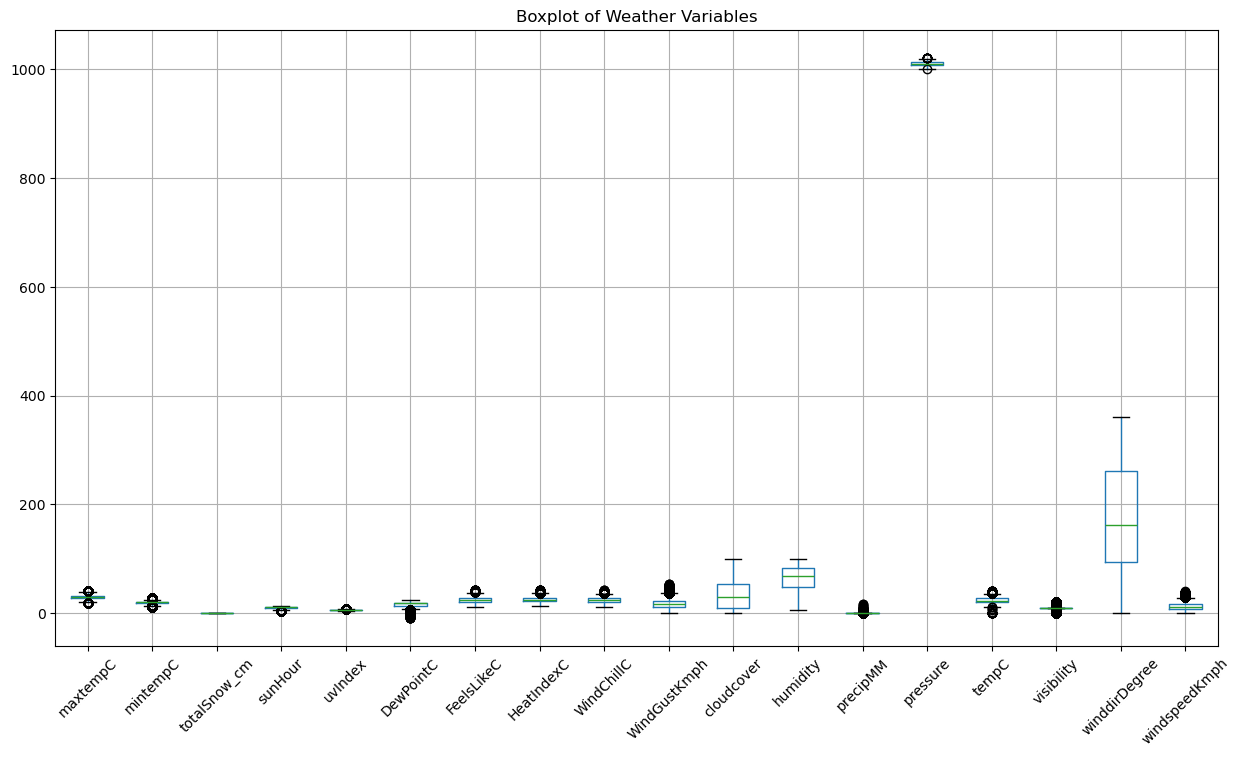

In [14]:
 #Identify Outliers   

numeric_columns = ['maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour',
                   'uvIndex', 'DewPointC', 'FeelsLikeC', 'HeatIndexC',
                   'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity',
                   'precipMM', 'pressure', 'tempC', 'visibility', 
                   'winddirDegree', 'windspeedKmph']

plt.figure(figsize=(15, 8))
bgdf[numeric_columns].boxplot(rot=45)  # Rotate labels for better readability
plt.title("Boxplot of Weather Variables")
plt.show()


In [15]:
# To find the number of outliers

Q1 = bgdf[numeric_columns].quantile(0.25)
Q3 = bgdf[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as values outside 1.5*IQR
outliers_bgdf = ((bgdf[numeric_columns] < (Q1 - 1.5 * IQR)) | 
               (bgdf[numeric_columns] > (Q3 + 1.5 * IQR)))

print(outliers_bgdf.sum())  # Number of outliers per column


maxtempC           336
mintempC          3168
totalSnow_cm         0
sunHour           1776
uvIndex           2496
DewPointC         3705
FeelsLikeC         121
HeatIndexC         260
WindChillC         625
WindGustKmph       877
cloudcover           0
humidity             0
precipMM         11828
pressure            12
tempC              278
visibility       19032
winddirDegree        0
windspeedKmph     1192
dtype: int64


In [16]:
# Remove outliers
bgdf_cleaned = bgdf[ ~((bgdf[numeric_columns] < (Q1 - 1.5 * IQR)) | 
                  (bgdf[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1) ]
# Print the number of removed rows
print(f"Removed {bgdf.shape[0] - bgdf_cleaned.shape[0]} outlier rows.")

Removed 32308 outlier rows.


In [17]:
# Save the cleaned dataset
bgdf_cleaned.to_csv("cleaned_weather_data.csv", index=False)
bgdf_cleaned.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,pressure,tempC,visibility,winddirDegree,windspeedKmph,year,month,day,temp_rangeC,wind_category
30,2009-01-02 06:00:00,27.0,16.0,0.0,11.6,5.0,38,10:34 AM,10:51 PM,06:42 AM,...,1016.0,18.0,10,116,5,2009,1,2,11.0,Calm
31,2009-01-02 07:00:00,27.0,16.0,0.0,11.6,5.0,38,10:34 AM,10:51 PM,06:42 AM,...,1016.0,20.0,10,105,5,2009,1,2,11.0,Calm
32,2009-01-02 08:00:00,27.0,16.0,0.0,11.6,5.0,38,10:34 AM,10:51 PM,06:42 AM,...,1016.0,23.0,10,94,6,2009,1,2,11.0,Calm
33,2009-01-02 09:00:00,27.0,16.0,0.0,11.6,5.0,38,10:34 AM,10:51 PM,06:42 AM,...,1015.0,26.0,10,83,6,2009,1,2,11.0,Calm
34,2009-01-02 10:00:00,27.0,16.0,0.0,11.6,5.0,38,10:34 AM,10:51 PM,06:42 AM,...,1014.0,26.0,10,94,7,2009,1,2,11.0,Calm


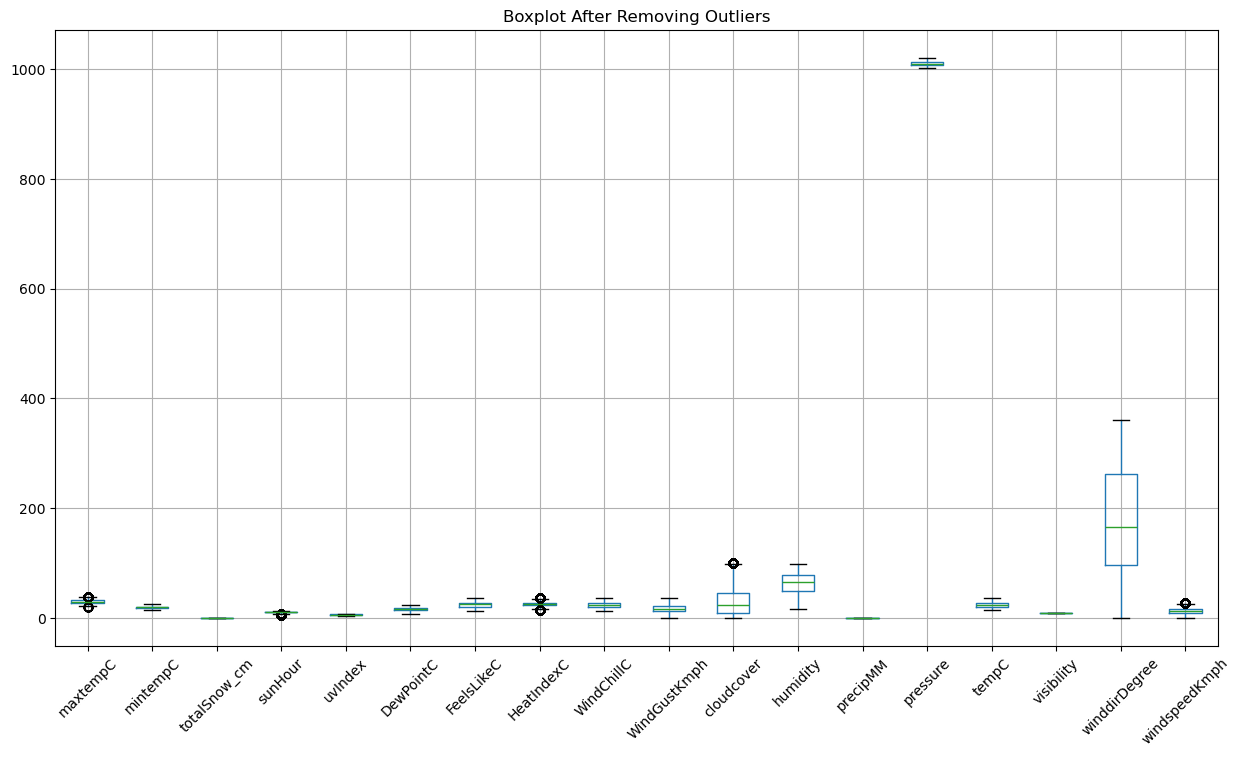

In [18]:
#Verify Outliers Are Removed

plt.figure(figsize=(15, 8))
bgdf_cleaned[numeric_columns].boxplot(rot=45)
plt.title("Boxplot After Removing Outliers")
plt.savefig("box_plot.png", dpi=300, bbox_inches="tight")
plt.show()

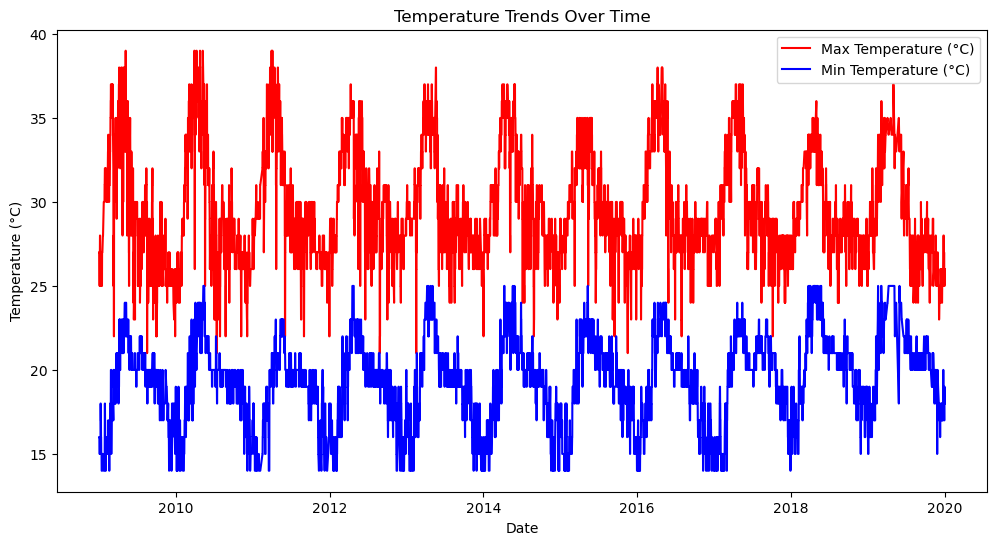

In [19]:
# Temperature Trends Over Time

plt.figure(figsize=(12, 6))
plt.plot(bgdf_cleaned['date_time'], bgdf_cleaned['maxtempC'], label='Max Temperature (°C)', color='red')
plt.plot(bgdf_cleaned['date_time'], bgdf_cleaned['mintempC'], label='Min Temperature (°C)', color='blue')
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Trends Over Time")
plt.legend()
plt.savefig("Plot.png", dpi=300)
plt.show()
# This helps identify seasonal patterns in temperature.

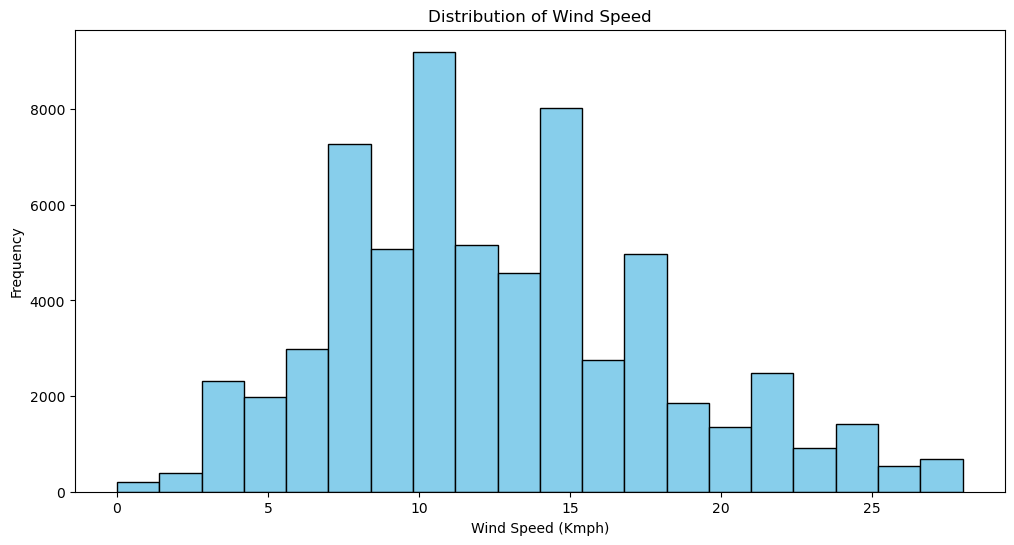

In [20]:
# Wind Speed Analysis
plt.figure(figsize=(12, 6))
plt.hist(bgdf_cleaned['windspeedKmph'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Wind Speed (Kmph)")
plt.ylabel("Frequency")
plt.title("Distribution of Wind Speed")
plt.savefig("histogram.png", dpi=300)
plt.show()


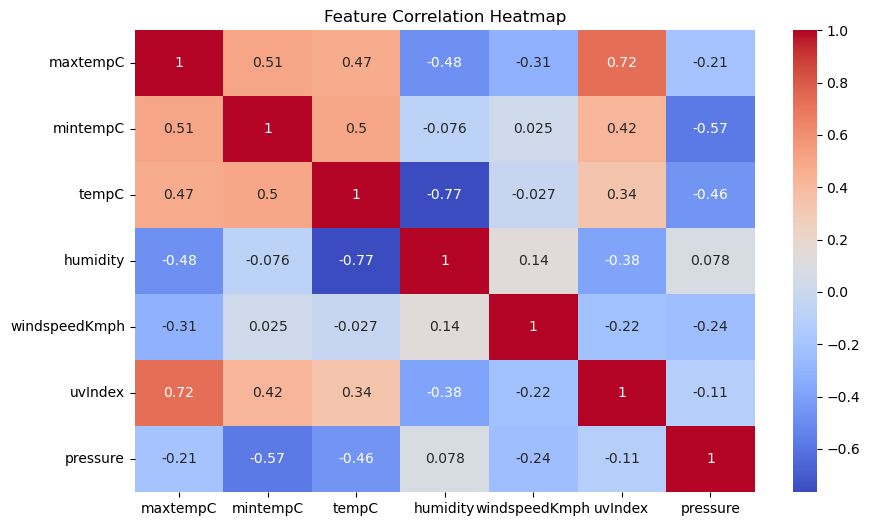

In [21]:
# Correlation Heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(bgdf_cleaned[["maxtempC", "mintempC","tempC","humidity","windspeedKmph",'uvIndex','pressure']].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.savefig("heatmap.png", dpi=300)
plt.show()


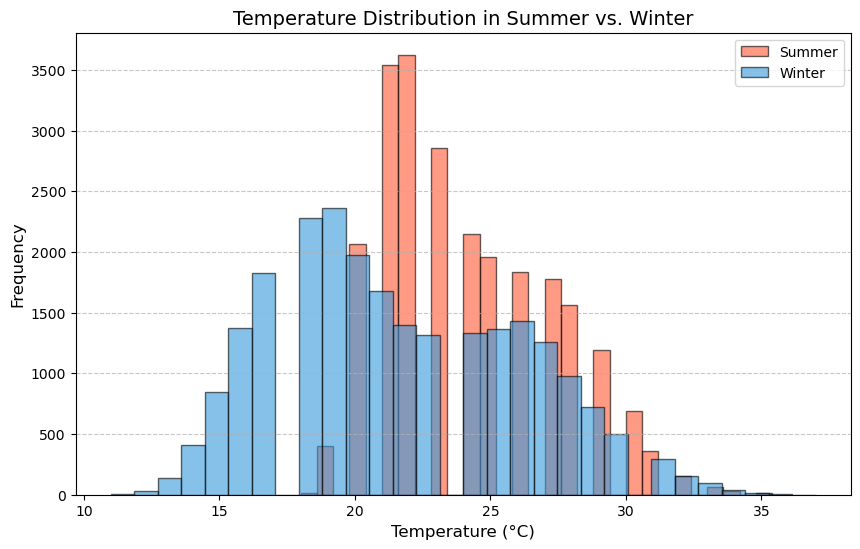

In [26]:
# Extract month from date_time
bgdf["month"] = bgdf["date_time"].dt.month

# Define summer (June, July, August) and winter (December, January, February)
summer_months = [6, 7, 8]
winter_months = [12, 1, 2]

# Filter summer and winter data
summer_data = bgdf[bgdf["month"].isin(summer_months)]
winter_data = bgdf[bgdf["month"].isin(winter_months)]

# Plot histogram
plt.figure(figsize=(10, 6))

plt.hist(summer_data["tempC"], bins=30, color="#FF5733", alpha=0.6, label="Summer", edgecolor="black")
plt.hist(winter_data["tempC"], bins=30, color="#3498DB", alpha=0.6, label="Winter", edgecolor="black")

# Customize the plot
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Temperature Distribution in Summer vs. Winter", fontsize=14)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Save the plot as PNG
plt.savefig("temperature_distribution_histogram.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()